# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

## Generate Cities List

In [2]:
# Set up distance points and cities
lat_lngs = []
cities = []

# Set lat and long points
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Coordinate city to lat/long points
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# API Key
api_key = "550066f76f8f8a79fb8831c0c9bb855d"

# owm.org
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
# Create dataframe columns for scatterplots 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Set record to 1
record = 1

# Alexa statement
print(f"Alexa, what's the weather for today?")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"The forecast for {city} is:")
        print(f"{url}&q={city}")
        
        #Set record to record +1
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # Message if there is no info available
    except:
         print("I'm sorry, I don't have information for that city.")
    continue

Alexa, what's the weather for today?
-------------------------------
The forecast for hilo is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=hilo
The forecast for buraydah is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=buraydah
The forecast for arraial do cabo is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=arraial do cabo
The forecast for yellowknife is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=yellowknife
The forecast for rikitea is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=rikitea
The forecast for ushuaia is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=ushuaia
The forecast for geraldton is:
http://api.openweathermap.org/data/2.5/w

The forecast for arandis is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=arandis
The forecast for awjilah is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=awjilah
The forecast for ambanja is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=ambanja
The forecast for azare is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=azare
I'm sorry, I don't have information for that city.
The forecast for clyde river is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=clyde river
The forecast for ponta do sol is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=ponta do sol
The forecast for alice springs is:
http://api.openweathermap.org/data/2.5/weather?units=Imperia

The forecast for hithadhoo is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=hithadhoo
The forecast for san jeronimo is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=san jeronimo
I'm sorry, I don't have information for that city.
The forecast for port hedland is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=port hedland
The forecast for henderson is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=henderson
The forecast for dikson is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=dikson
The forecast for torbay is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=torbay
The forecast for airai is:
http://api.openweathermap.org/data/2.5/weather?units=Imper

The forecast for high level is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=high level
The forecast for norfolk is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=norfolk
The forecast for saint-pierre is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=saint-pierre
I'm sorry, I don't have information for that city.
The forecast for kruisfontein is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=kruisfontein
The forecast for north bend is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=north bend
The forecast for karratha is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=karratha
The forecast for champerico is:
http://api.openweathermap.org/data/2.5/weat

The forecast for tucuman is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=tucuman
The forecast for mahajanga is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=mahajanga
The forecast for san vicente is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=san vicente
The forecast for lagoa is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=lagoa
I'm sorry, I don't have information for that city.
The forecast for beringovskiy is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=beringovskiy
The forecast for kars is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=kars
The forecast for richards bay is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

The forecast for hwange is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=hwange
The forecast for marsa matruh is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=marsa matruh
The forecast for pleasanton is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=pleasanton
The forecast for westport is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=westport
The forecast for dothan is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=dothan
The forecast for lamu is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=lamu
The forecast for shimoda is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=shimoda
The forecast

The forecast for bulgan is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=bulgan
The forecast for gencsapati is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=gencsapati
The forecast for salym is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=salym
I'm sorry, I don't have information for that city.
The forecast for severo-kurilsk is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=severo-kurilsk
The forecast for yulara is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=yulara
The forecast for nacozari is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=nacozari
The forecast for coroico is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

The forecast for salur is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=salur
The forecast for mugur-aksy is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=mugur-aksy
The forecast for amapa is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=amapa
The forecast for ephrata is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=ephrata
The forecast for barabai is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=barabai
The forecast for isangel is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=isangel
The forecast for rotterdam is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=rotterdam
The forecast for n

The forecast for kalmunai is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=kalmunai
The forecast for krasnoarmeysk is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=krasnoarmeysk
The forecast for cabra is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=cabra
The forecast for nacala is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=nacala
The forecast for slonim is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=slonim
I'm sorry, I don't have information for that city.
I'm sorry, I don't have information for that city.
The forecast for pucara is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=pucara
I'm sorry, I don't have information for that city.
The

The forecast for fortuna is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=fortuna
The forecast for wajima is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=wajima
The forecast for mutoko is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=mutoko
The forecast for grand gaube is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=grand gaube
The forecast for cururupu is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=cururupu
The forecast for muli is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f8f8a79fb8831c0c9bb855d&q=muli
I'm sorry, I don't have information for that city.
The forecast for juchipila is:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=550066f76f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# Establish dictionary w/ API data
weather_dictionary = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_df = pd.DataFrame(weather_dictionary)

# Display data frame head 
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hilo,90,US,1539283980,84,19.71,-155.08,75.92,9.19
1,Buraydah,0,SA,1539284400,23,26.33,43.97,84.20,9.17
2,Arraial do Cabo,75,BR,1539288000,88,-22.97,-42.02,77.00,5.82
3,Yellowknife,75,CA,1539284400,74,62.45,-114.38,33.80,2.24
4,Rikitea,88,PF,1539288646,100,-23.12,-134.97,70.66,10.98


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

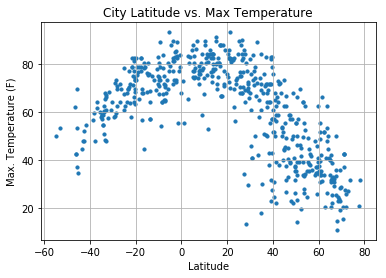

In [15]:
#Build scatterplot for latitude v. temperature
plt.scatter(weather_df["Lat"], weather_data["Max Temp"], marker="o", s=10)

# X, Y, Title, grid
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

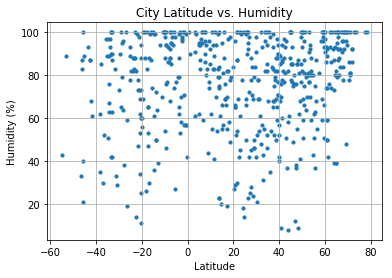

In [16]:
# Build a scatter plot for latitude v. humidity
plt.scatter(weather_df["Lat"], weather_data["Humidity"], marker="o", s=10)

# X, Y, Title, grid
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

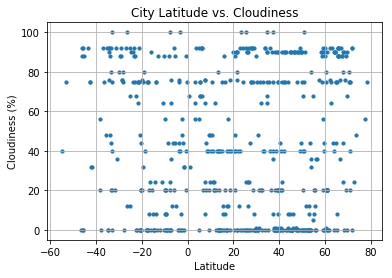

In [17]:
# Build a scatter plot for latitude vs. Cloudiness
plt.scatter(weather_df["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

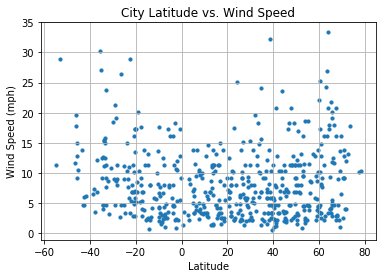

In [18]:
# Build a scatter plot for Latitude vs. Wind Speed Plot
plt.scatter(weather_df["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# X, Y, Title, grid
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()